# Visualization

Swan offers many different visualization options to understand your transcriptomes. This tutorial includes instructions on the following:

* [Gene summary graphs](#gene_summary)
* [Transcript path graphs](#transcript_path)
* [Saving a figure](#save_fig)
* [Swan reports](#swan_report)

Running this tutorial on my laptop took under a minute and 3 GB of RAM.

In [7]:
# this is just to display saved images
from IPython.display import display, Image

In [2]:
%matplotlib inline
import swan_vis as swan

# code to download this data is in the Getting started tutorial
sg = swan.read('data/swan.p')

Read in graph from data/swan.p


## <a name="gene_summary"></a>Gene summary graphs
Gene summary graphs display a high-level summary of the complexity of splicing within a certain gene locus. All observed splice sites and splice junctions from input datasets, and the annotation (if added) are plotted in full color. Genes can be called to be plotted either using their gene ids or gene names, but we recommend using gene ids as we have encountered redundant gene names during testing.

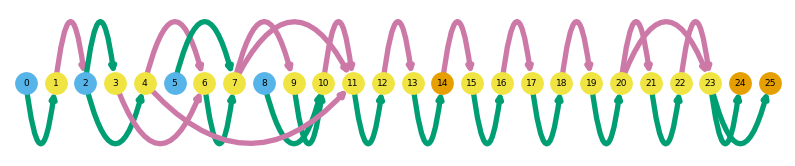

In [3]:
# plot a gene summary graph for the given gene
sg.plot_graph('ADRM1')

Gene summary graphs are a type of graph plot and therefore have plotting options that allow the user to highlight nodes and edges that are either not present in the annotation with the `indicate_novel=True` option.

For instance, say we want to highlight the nodes and edges that are not seen in the annotation. In this representation, nodes (splice sites) that are not present in the annotation will appear outlined, and intronic or exonic regions (edges) that are not present in the annotation will appear dashed.  

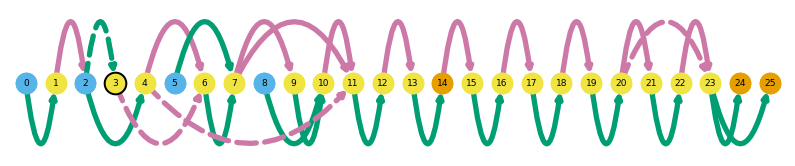

In [4]:
# plot a gene summary graph with novel splice sites and 
# splice junctions plotted as outlined nodes and dashed edges respectively
sg.plot_graph('ADRM1', indicate_novel=True)

<!-- Similarly, you can highlight the nodes that come from a specific dataset. Outlined nodes and dashed edges are those that are present in the queried dataset. -->

In [5]:
# # plot a gene summary graph with splice sites and splice junctions
# # that are present in the indicated dataset as outlined nodes
# # and dashed edges respectively
# sg.plot_graph('ADRM1', indicate_dataset='hepg2_1_chr20')

<!-- By default `plot_graph` will display the image immediately. To avoid this, set `display=False`. -->

In [6]:
# # plot a gene summary graph without displaying it
# sg.plot_graph('ADRM1', indicate_novel=True, display=False)

## <a name="transcript_path"></a>Transcript path graphs


Transcript path graphs display the same structure as gene summary graphs but gray out nodes and edges (splice sites and intronic/exonic regions) that are not present in the given transcript. In this case, the transcript id field is needed to plot the path.

In [7]:
# sg.t_df.loc[sg.t_df.gname=='ADRM1']

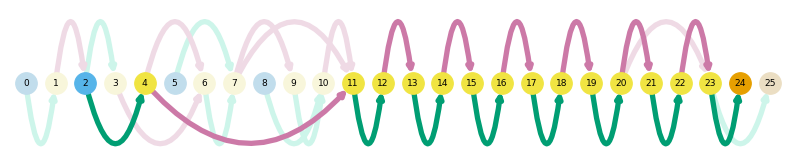

In [8]:
# plot the path of a specific transcript through its parent gene
# summary graph for a given transcript
sg.plot_transcript_path('TALONT000301961')

You can use the `indicate_novel=True` option for transcript path Swan graphs too.

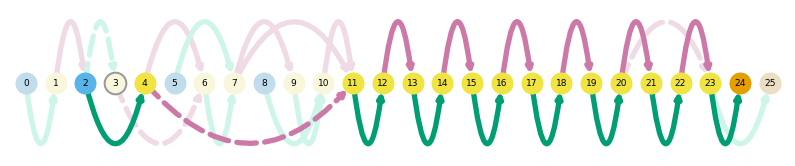

In [9]:
# plot the path of a specific transcript through its parent gene summary
# graph for a given transcript
# plot novel splice sites as outlined nodes
# plot novel splice junctions as dashed edges
sg.plot_transcript_path('TALONT000301961', indicate_novel=True)

In [10]:
# # plot the path of a specific transcript through its parent gene summary
# # graph for a given transcript
# # plot splice sites from the given dataset as outlined nodes
# # plot splice junctions from the given dataset as dashed edges
# sg.plot_transcript_path('TALONT000301953', indicate_dataset='HFFc6_1')

For transcripts, there is also a unique option that allows you to generate the genome-browser style representation of a transcript, using the `browser` option.

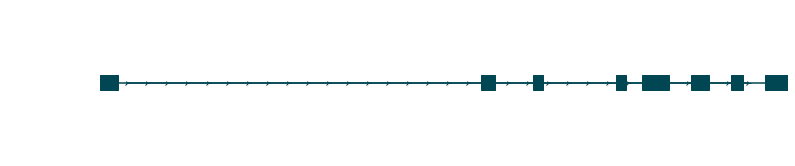

In [11]:
# plot the traditional browser-style representation 
# for a given transcript
sg.plot_transcript_path('TALONT000301961', browser=True)

## <a name="save_fig"></a>Saving a figure

Saving a figure in Swan for `plot_graph` and for `plot_transcript_path` can be done in two different ways.

The first way involves calling `save_fig` after your figure has been generated. This method allows you to give your figure whatever name you want.

In [12]:
# plot gene summary graph for a given gene
sg.plot_graph('ADRM1')

# save the currently-plotted figure with the given filename and location
swan.save_fig('figures/my_gene_summary.png')

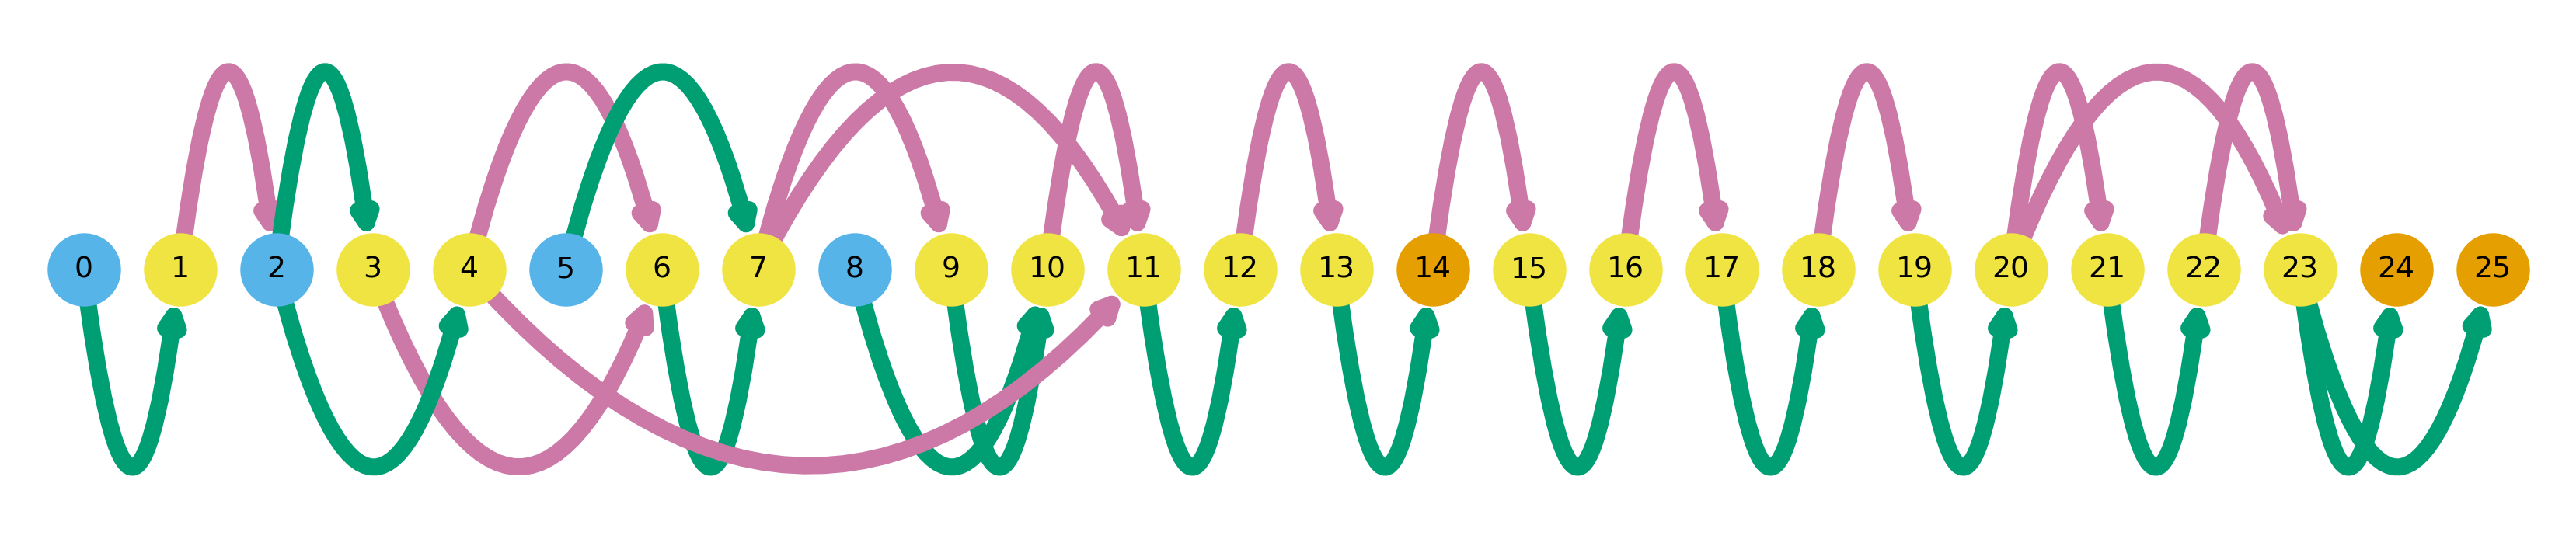

In [13]:
display(Image(filename='figures/my_gene_summary.png'))

The second way only requires one line of code and requires that the user pass the corresponding plotting function a `prefix` for the filename and path. The file will be automatically named according to the settings in the graph.

In [14]:
# plot a gene summary graph with novel splice sites and junctions
# outlined and dashed respectively
# save the figure with the given prefix
sg.plot_graph('ADRM1', indicate_novel=True, prefix='figures/adrm1')

Saving summary graph for ENSG00000130706.12 as figures/adrm1_novel_ENSG00000130706.12_summary.png


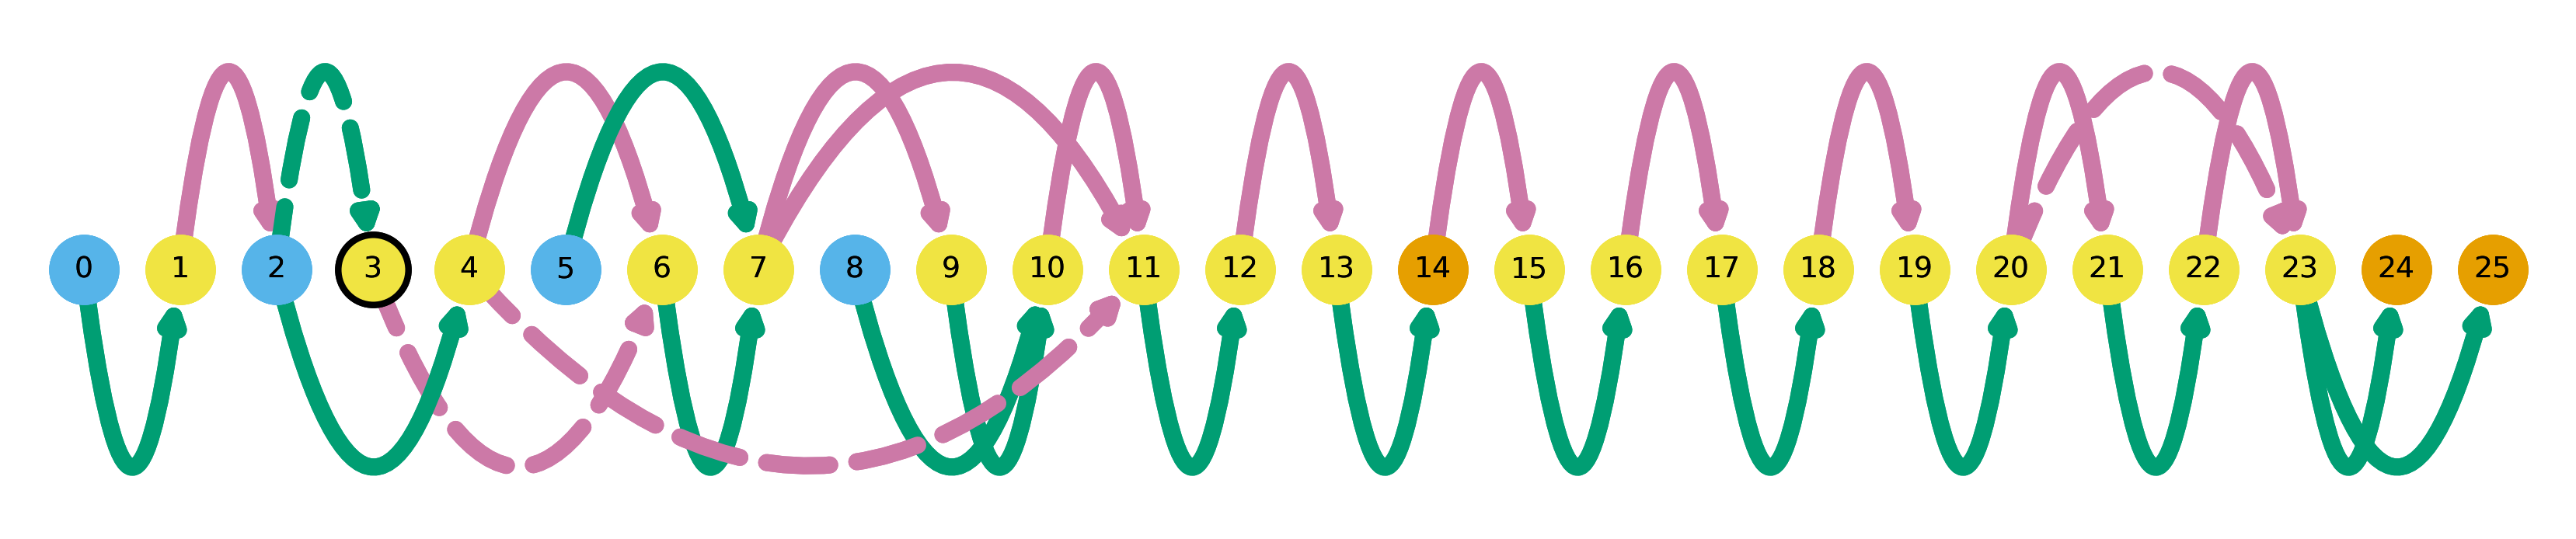

In [15]:
display(Image(filename='figures/adrm1_novel_ENSG00000130706.12_summary.png'))

As you can see, here the gene name ADRM1 is not used to save the figure because we have encountered conflicing gene names in our internal use of Swan. To avoid these clashes, Swan automatically fetches the gene id associated with the first instance of the gene name it finds and uses it to save the graph, in the interest of not accidentally overwriting a preexisting file.

## <a name="swan_report"></a>Swan reports

Swan reports display all the expressed transcripts in a given gene in a PDF format. There are many ways to customize these reports so here are a few. Unlike the above plotting options, the user must provide a `prefix` argument as there are many files that must be automatically generated to create the report.

In [3]:
uns_key = swan.make_uns_key(kind='det',
                            obs_col='cell_line',
                            obs_conditions=['hffc6', 'hepg2'])
sg.adata.uns[uns_key].head()

tid  pval  qval      log2fc      mean  zero_mean  \
21101   ENST00000367818.3   0.0   0.0 -297.776029  0.400283      False   
136458  ENST00000544590.1   0.0   0.0 -297.776029  0.235725      False   
184787  ENST00000614343.4   0.0   0.0 -297.776029  8.383710      False   
136347  ENST00000544413.2   0.0   0.0 -297.776029  0.400283      False   
7079    ENST00000297438.6   0.0   0.0 -297.776029  0.636007      False   

                grad    coef_mle        coef_sd        ll                 gid  \
21101   6.215788e-01 -297.776029  2.222759e-162  0.000000   ENSG00000143184.4   
136458  3.896951e-01 -297.776029  2.222759e-162  0.000000  ENSG00000109920.12   
184787  1.193476e-09 -297.776029  2.222759e-162 -8.021155  ENSG00000211445.11   
136347  6.215788e-01 -297.776029  2.222759e-162  0.000000  ENSG00000135100.17   
7079    3.295080e-02 -297.776029  2.222759e-162  0.000000  ENSG00000164823.10   

         gname  
21101     XCL1  
136458   FNBP4  
184787    GPX3  
136347   HNF1A  
7079    OSGIN2

In [9]:
# generate a report for the given gene 
# save it with the given filepath prefix
# include differential transcript expression test significance results
# (defaults to significance threshold q >= 0.05)
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
sg.gen_report('ADRM1',
              prefix='figures/adrm1_paper',
              novelty=True, 
              indicate_novel=True)


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_paper_novel_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_paper_novel_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_paper_novel_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_paper_novel_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_paper_novel_TALONT000301961_path.png
Generating report for ENSG00000130706.12


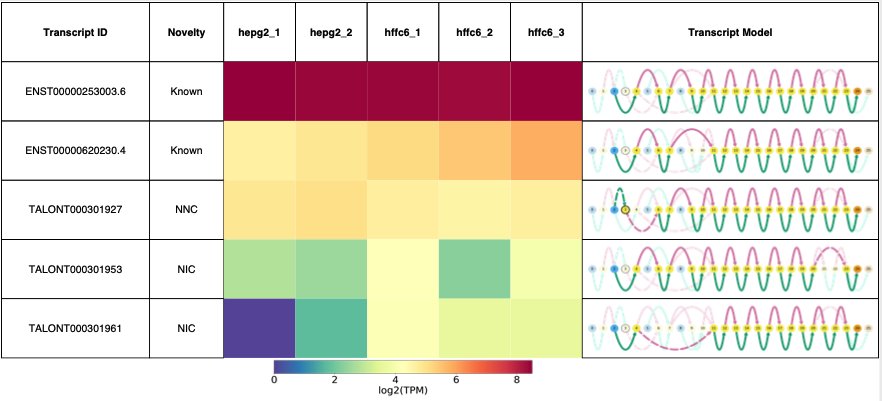

In [10]:
display(Image(filename='figures/adrm1_paper_novel_ENSG00000130706.12_report.png'))

You can also generate a report where differentially-expressed transcripts from prior tests are bolded. Use the `include_qvals=True` option and tell Swan which differential transcript expression test results to display using `qval_obs_col` and `qval_obs_conditions`. Here, I'll show the results of the HFFc6 vs. HepG2 differential transcript expression test that was run in the Analysis tutorial.

In [11]:
# generate a report for the given gene 
# save it with the given filepath prefix
# include differential transcript expression test significance results
# (defaults to significance threshold q >= 0.05)
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
# include the qvals from differential transcript expression test
# differential transcript expression test metadata variable: cell_line
# differential transcript expression test categories to compare: hepg2, hffc6
sg.gen_report('ADRM1',
              prefix='figures/adrm1_paper',
              novelty=True, 
              indicate_novel=True,
              include_qvals=True,
              qval_obs_col='cell_line',
              qval_obs_conditions=['hepg2', 'hffc6'])


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_paper_novel_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_paper_novel_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_paper_novel_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_paper_novel_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_paper_novel_TALONT000301961_path.png
Generating report for ENSG00000130706.12


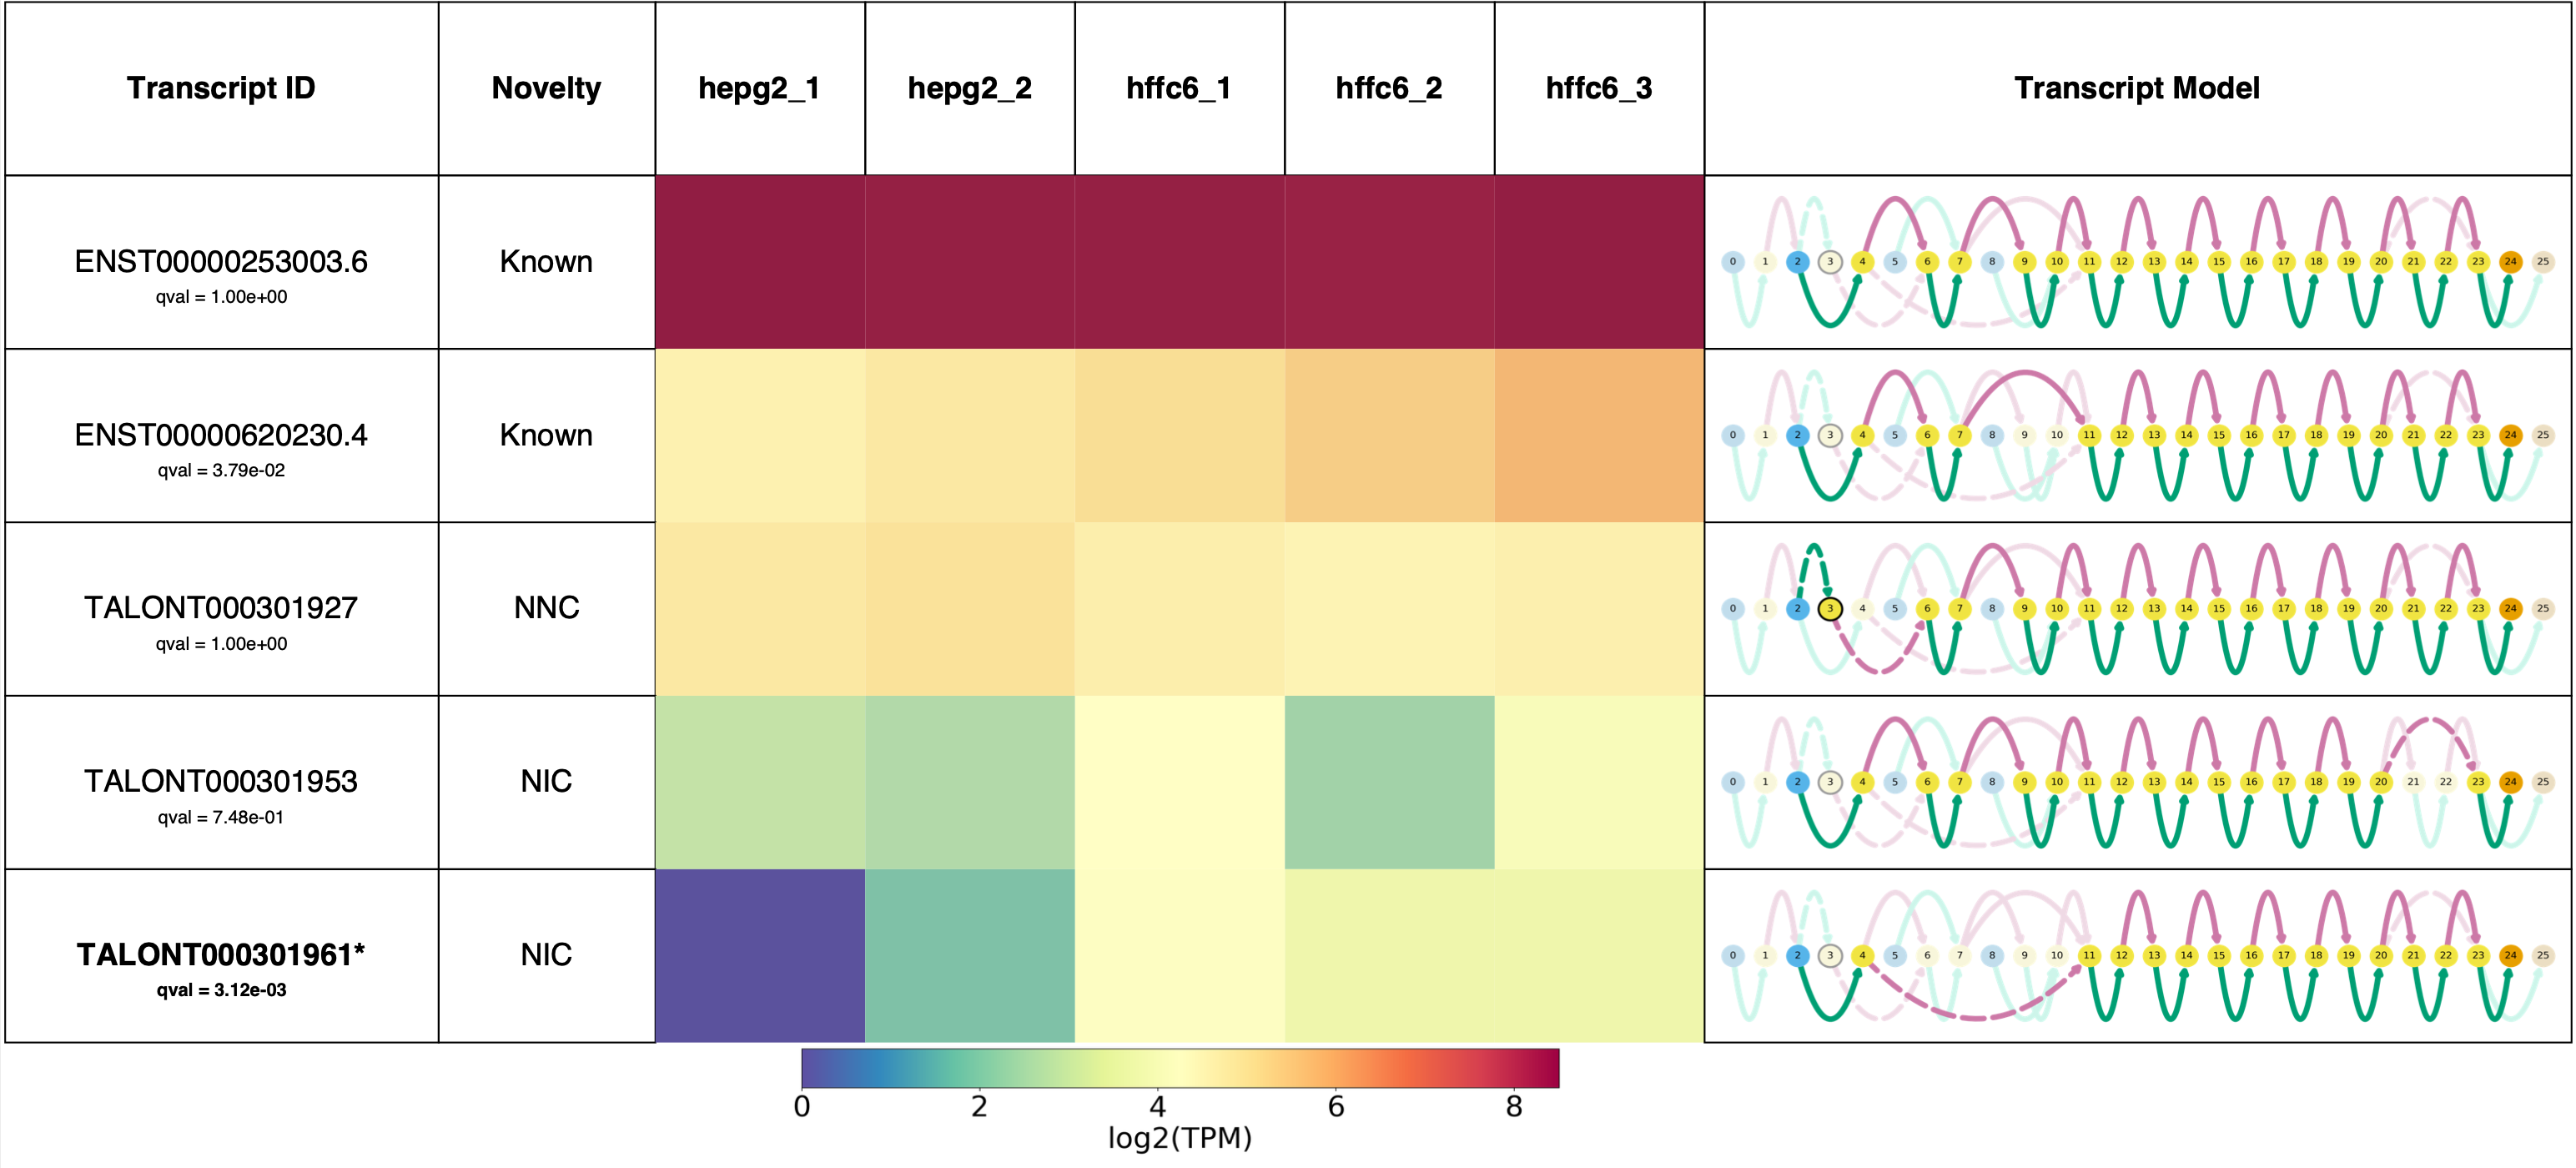

In [12]:
display(Image(filename='figures/adrm1_paper_novel_qval_ENSG00000130706.12_report.png'))

You can also plot transcripts based on their percent isoform (pi) values using `layer=pi`, which help illustrate the basis on which isoform switches are called in Swan. Here I'm choosing to plot it in a separate color using the `cmap` argument to make it clear that the metric being plotted is different, and overlaying each cell with the pi value using `display_numbers=True`. 

For this example, I'll plot a gene that was called as isoform switching by the Swan isoform switching module, NIPAL3.

In [13]:
# generate a report for the given gene 
# save it with the given filepath prefix
# plot the percent isoform (pi) values 
# use the magma color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
sg.gen_report('NIPAL3',
              prefix='figures/nipal3',
              layer='pi',
              cmap='magma',
              display_numbers=True,
              novelty=True, 
              indicate_novel=True)


Plotting transcripts for ENSG00000001461.16
Saving transcript path graph for ENST00000374399.8 as figures/nipal3_novel_ENST00000374399.8_path.png
Saving transcript path graph for ENST00000339255.2 as figures/nipal3_novel_ENST00000339255.2_path.png
Saving transcript path graph for ENST00000488155.1 as figures/nipal3_novel_ENST00000488155.1_path.png
Saving transcript path graph for ENST00000358028.8 as figures/nipal3_novel_ENST00000358028.8_path.png
Saving transcript path graph for ENST00000003912.7 as figures/nipal3_novel_ENST00000003912.7_path.png
Generating report for ENSG00000001461.16


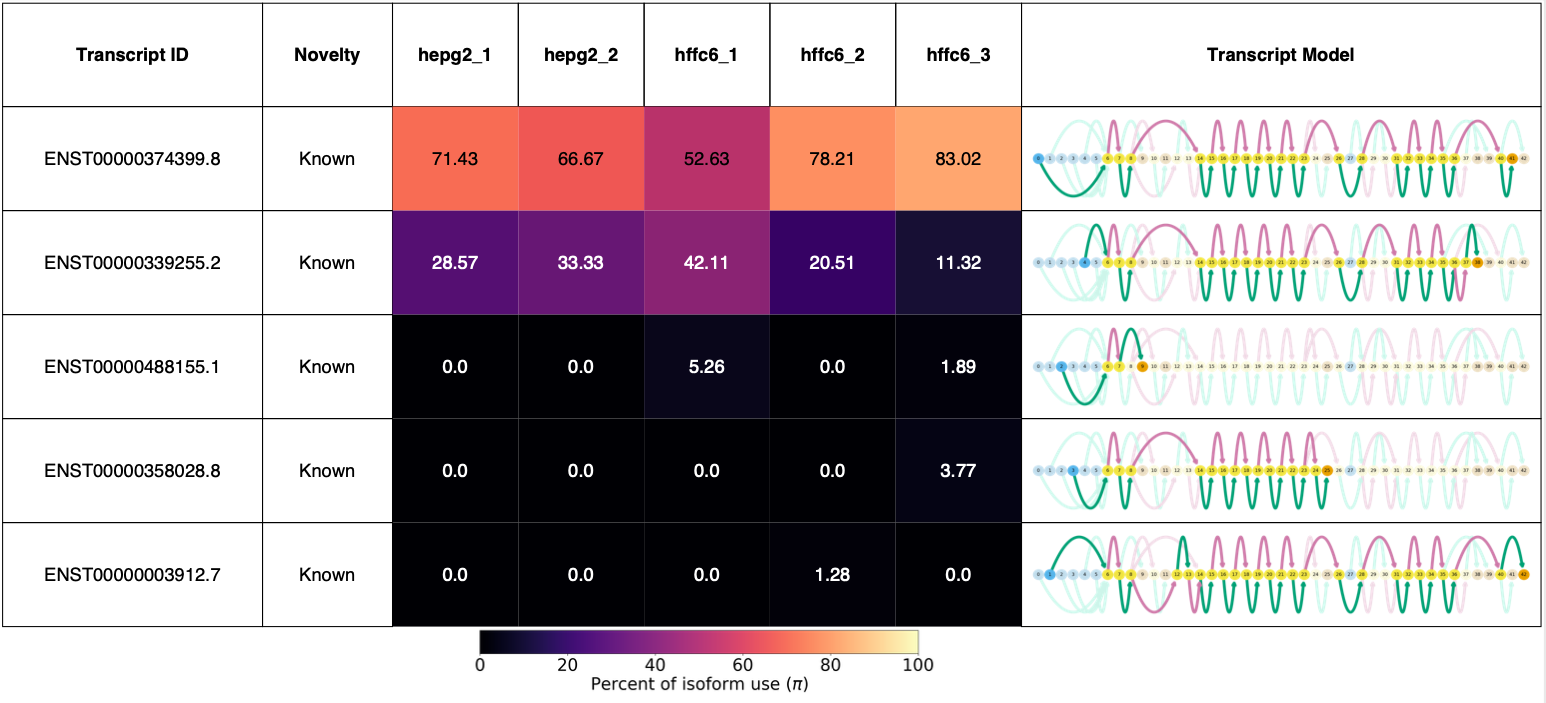

In [14]:
display(Image(filename='figures/nipal3_novel_ENSG00000001461.16_report.png'))

In these cases, it can be beneficial to actually look at the data in the original groups that the isoform switching test was performed. To group your input samples by a metadata column that can be found in `sg.adata.obs` in the report, use the `groupby` option. Here, I've also demonstrated that if you have transcript names in your GTF or TALON db, that those can be displayed instead of the transcript IDs using `transcript_name=True`.

In [24]:
# generate a report for the given gene 
# save it with the given filepath prefix
# plot the percent isoform (pi) values 
# use the magma color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
# group datasets based on the 'cell_line' metadata column
sg.gen_report('NIPAL3',
              prefix='figures/nipal3',
              layer='pi',
              cmap='magma',
              display_numbers=True,
              novelty=True, 
              indicate_novel=True,
              groupby='cell_line',
              transcript_name=True)


Plotting transcripts for ENSG00000001461.16
Saving transcript path graph for ENST00000374399.8 as figures/nipal3_novel_ENST00000374399.8_path.png
Saving transcript path graph for ENST00000339255.2 as figures/nipal3_novel_ENST00000339255.2_path.png
Saving transcript path graph for ENST00000488155.1 as figures/nipal3_novel_ENST00000488155.1_path.png
Saving transcript path graph for ENST00000358028.8 as figures/nipal3_novel_ENST00000358028.8_path.png
Saving transcript path graph for ENST00000003912.7 as figures/nipal3_novel_ENST00000003912.7_path.png
Generating report for ENSG00000001461.16


Using this strategy, the basis of the isoform switch is a little clearer. The longer isoform, NIPAL3-204, is proportionally higher-expressed in HFFc6, wherease NIPAL3-202 is proportionally higher-expressed in HepG2.

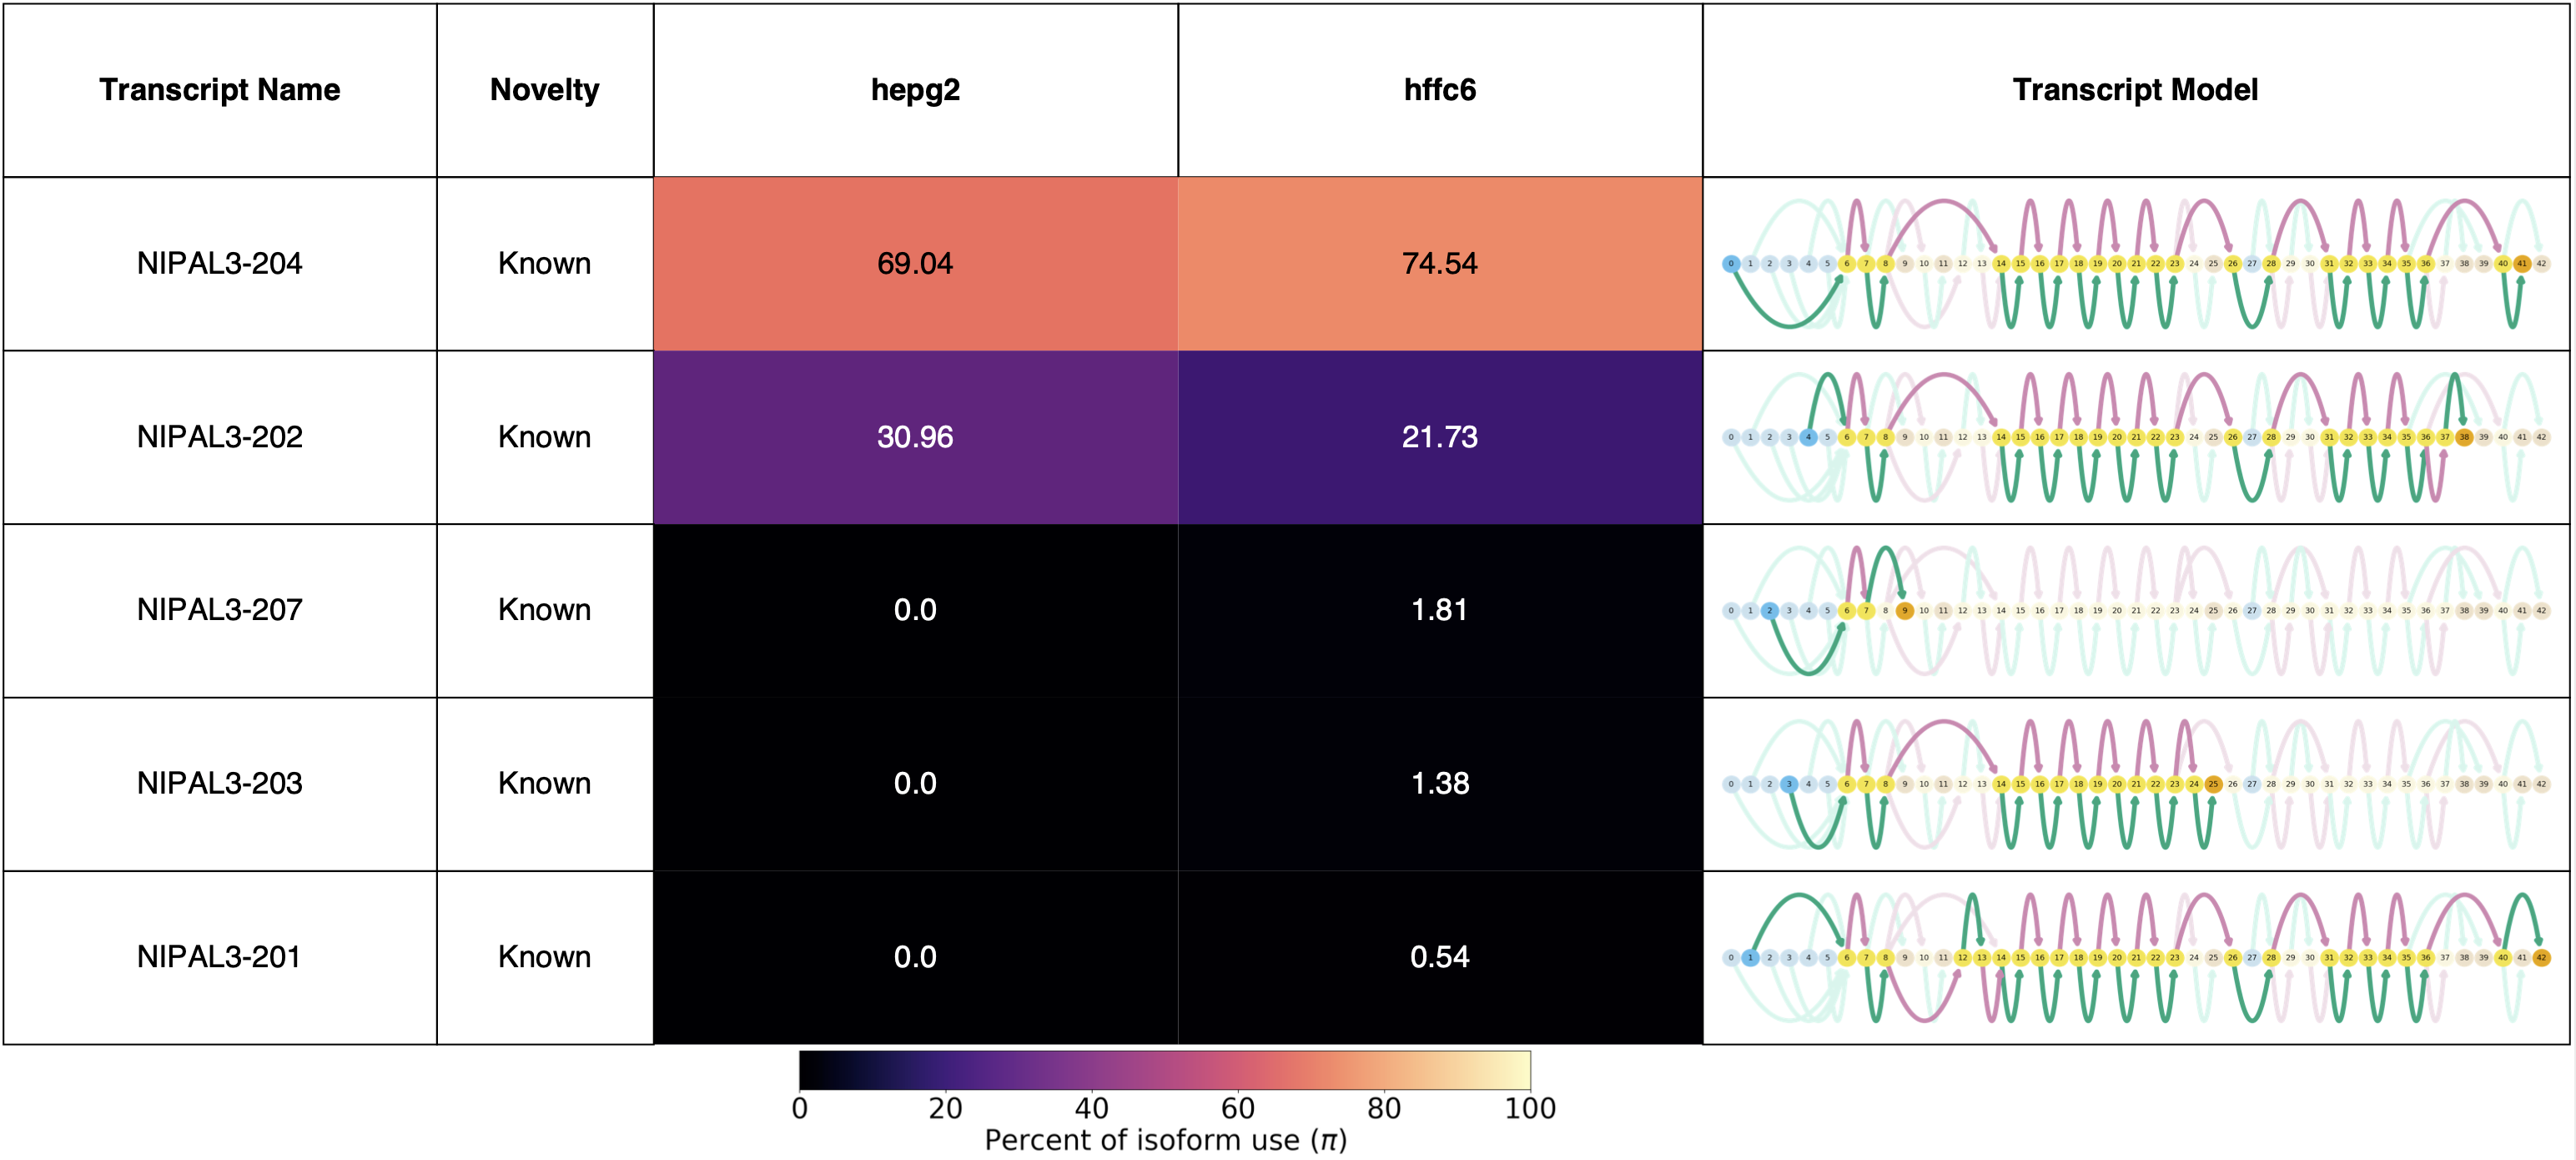

In [25]:
display(Image(filename='figures/nipal3_novel_cell_line_ENSG00000001461.16_report.png'))

Swan now supports using colors to represent metadata categories which can be useful for more complex sets of samples. Swan cannot automatically resize dataset names for gene reports and therefore I recommend using this strategy when plotting a large number of datasets.

First, assign colors to different metadata columns in `sg.adata.obs`. You can use hexcodes or [named Matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html).

In [17]:
sg.set_metadata_colors('cell_line', {'hepg2': 'gold', 'hffc6': '#ba55d3'})

Then use the `metadata_cols` option to indicate what colored metadata categories you'd like to plot at the top of the gene report. Here I'm also demonstrating the option to plot the browser-style transcript representation using the `browser=True` option.

In [18]:
# generate a report for the given gene 
# save it with the given filepath prefix
# plot the percent isoform (pi) values 
# use the magma color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# display novel splice sites and junctions 
#     as outlined nodes and dashed edges respectively
# group datasets based on the 'cell_line' metadata column
# color cell lines by metadata colors
# plot the genome browser representation of the transcript models
# include the qvals from differential transcript expression test
# differential transcript expression test metadata variable: cell_line
# differential transcript expression test categories to compare: hepg2, hffc6
sg.gen_report('ADRM1',
              prefix='figures/adrm1',
              layer='pi',
              cmap='magma',
              display_numbers=True,
              novelty=True, 
              groupby='cell_line',
              transcript_name=True, 
              metadata_cols=['cell_line'],
              browser=True,
              include_qvals=True,
              qval_obs_col='cell_line',
              qval_obs_conditions=['hepg2', 'hffc6'])


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_browser_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_browser_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_browser_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_browser_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_browser_TALONT000301961_path.png
Generating report for ENSG00000130706.12


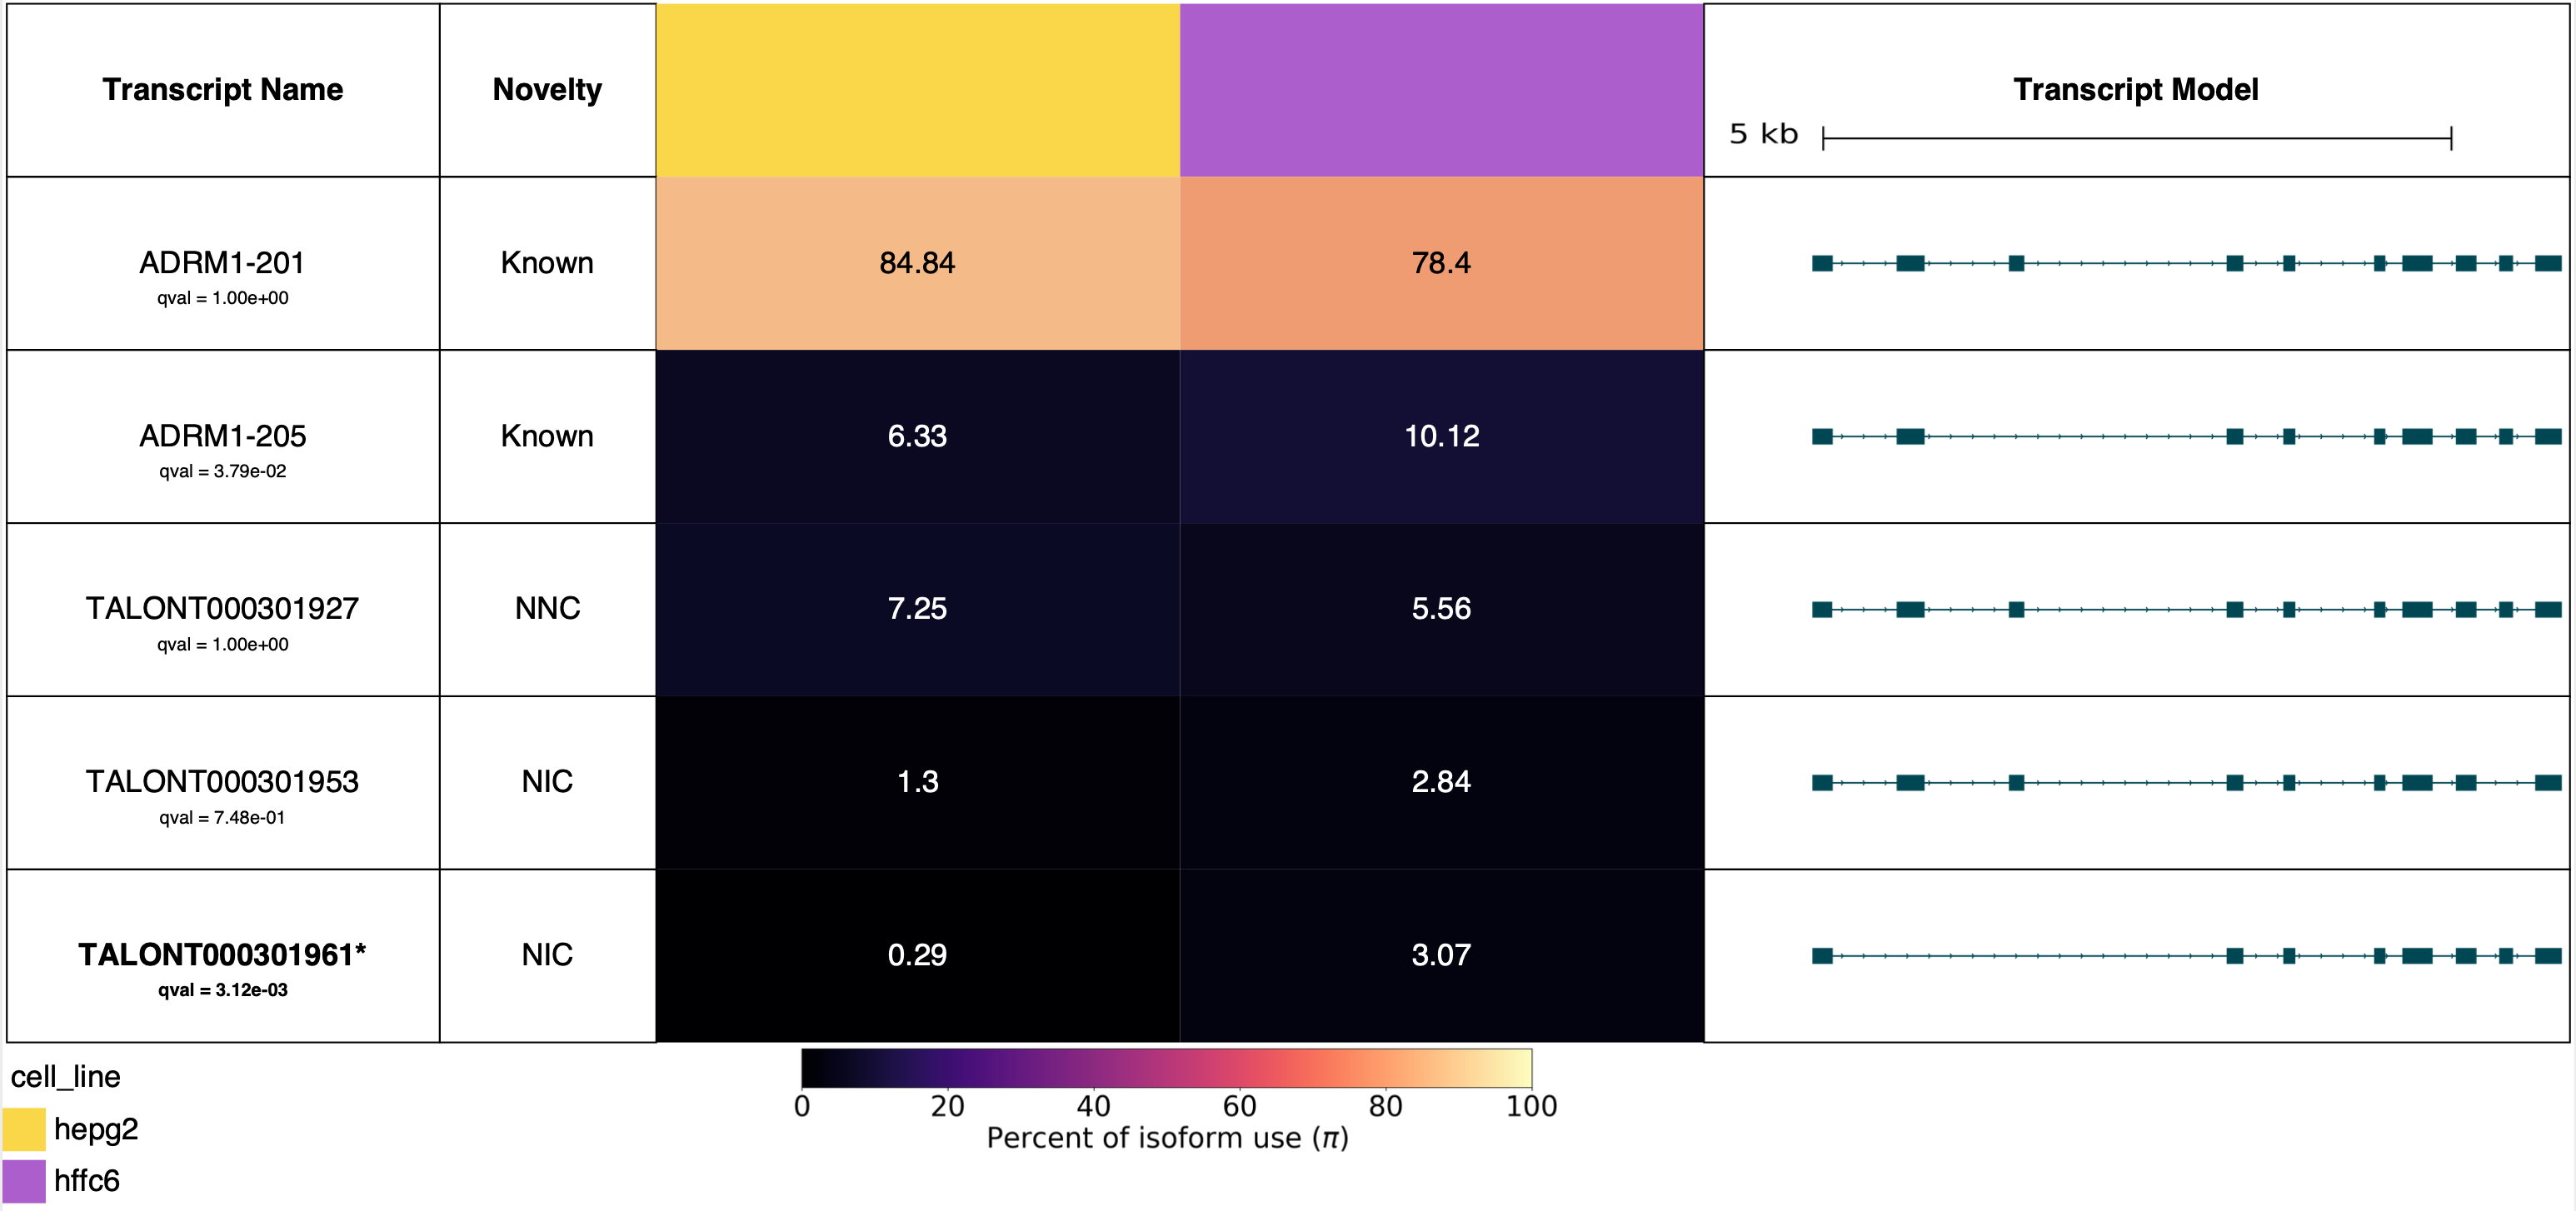

In [19]:
display(Image(filename='figures/adrm1_browser_color_cell_line_ENSG00000130706.12_report.png'))

You can also include more than one metadata column to color.

In [20]:
# from lighter to darker blue
sg.set_metadata_colors('replicate', {'1': '#bef4ff', 
                                     '2': '#73a8b2', 
                                     '3': '#263133'})

In [21]:
# generate a report for the given gene 
# save it with the given filepath prefix
# use the virids color way
# display values on top of each cell
# display the novelty category associated with the transcript 
# color cell lines and replicates by metadata colors
# plot the genome browser representation of the transcript models
sg.gen_report('ADRM1',
              prefix='figures/adrm1',
              cmap='viridis',
              display_numbers=True,
              novelty=True, 
              transcript_name=True, 
              metadata_cols=['cell_line', 'replicate'],
              browser=True)


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_browser_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_browser_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_browser_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_browser_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_browser_TALONT000301961_path.png
Generating report for ENSG00000130706.12


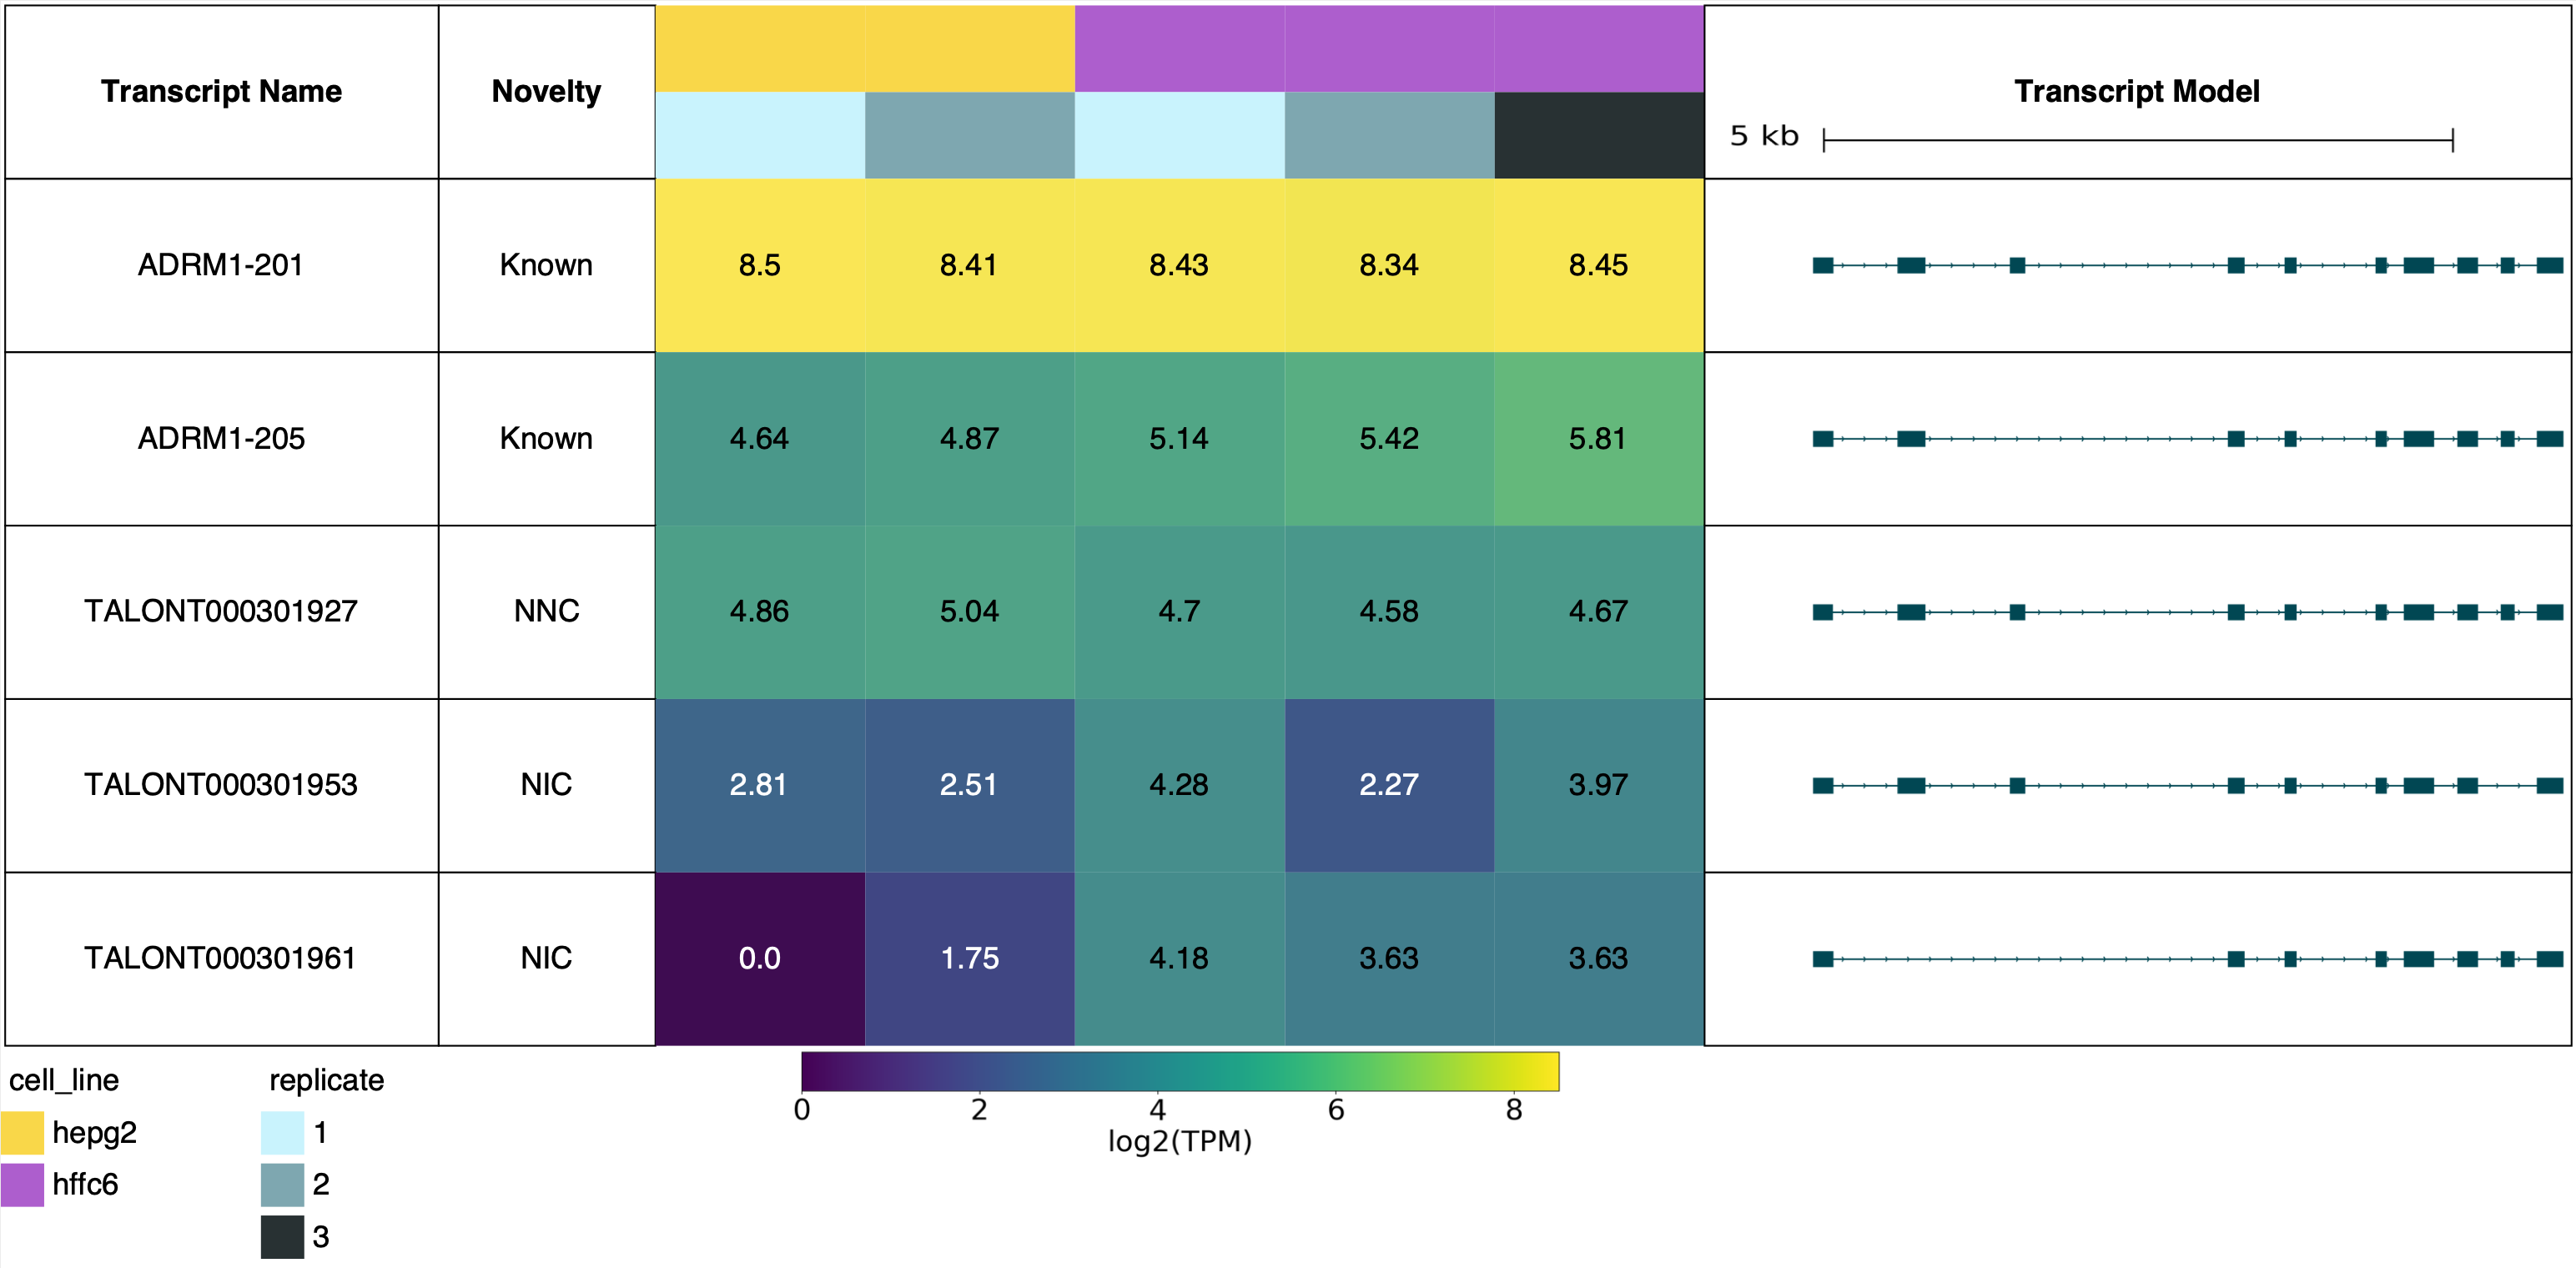

In [22]:
display(Image(filename='figures/adrm1_browser_color_replicate_cell_line_ENSG00000130706.12_report.png'))

Note that if I try to use the `groupby='cell_line'` option with `metadata_cols=['cell_line', 'replicate']`, Swan will throw an error because there are multiple distinct replicates that belong to each cell line which makes the groupby impossible.

In [23]:
# example of incompatible groupby and metadata_cols pairing
sg.gen_report('ADRM1',
              prefix='figures/adrm1',
              groupby='cell_line',
              metadata_cols=['cell_line', 'replicate'])

Exception: Metadata column replicate not compatible with groupby column cell_line. Groupby column has more than 1 unique possible value from metadata column.

You can also use multiple different metadata categories to groupby if you provide them as a list. For this, we'll take a look at a different, more complex dataset with the following metadata.

In [26]:
brain_sg = swan.read('data/swan_brain.p')
c_dict = {'hippocampus': 'deeppink', 'cortex': 'darkorchid'}
brain_sg.set_metadata_colors('brain_region', c_dict)
c_dict = {'2mo': '#bef4ff', '18-20mo': '#73a8b2'}
brain_sg.set_metadata_colors('age', c_dict)
brain_sg.adata.obs

Read in graph from data/swan_brain.p


dataset brain_region      age     sex
index                                                               
hipp_2mo_f_1              hipp_2mo_f_1  hippocampus      2mo  female
hipp_2mo_f_2              hipp_2mo_f_2  hippocampus      2mo  female
hipp_2mo_m_1              hipp_2mo_m_1  hippocampus      2mo    male
hipp_2mo_m_2              hipp_2mo_m_2  hippocampus      2mo    male
hipp_18-20mo_f_1      hipp_18-20mo_f_1  hippocampus  18-20mo  female
hipp_18-20mo_f_2      hipp_18-20mo_f_2  hippocampus  18-20mo  female
hipp_18-20mo_m_1      hipp_18-20mo_m_1  hippocampus  18-20mo    male
hipp_18-20mo_m_2      hipp_18-20mo_m_2  hippocampus  18-20mo    male
cortex_2mo_m_1          cortex_2mo_m_1       cortex      2mo    male
cortex_2mo_m_2          cortex_2mo_m_2       cortex      2mo    male
cortex_2mo_f_1          cortex_2mo_f_1       cortex      2mo  female
cortex_2mo_f_2          cortex_2mo_f_2       cortex      2mo  female
cortex_18-20mo_f_1  cortex_18-20mo_f_1       cortex  18-20mo  female
cortex_18-20mo_f_2  cortex_18-20mo_f_2       cortex  18-20mo  female
cortex_18-20mo_m_1  cortex_18-20mo_m_1       cortex  18-20mo    male
cortex_18-20mo_m_2  cortex_18-20mo_m_2       cortex  18-20mo    male

Say we want to group replicates belonging to the same brain region and age together in the report. We can do this by using `groupby=['brain_region', 'age']` as input to `gen_report()`.

In [27]:
# generate a report for the given gene 
# save it with the given filepath prefix
# use the magma color way
# display values on top of each cell
# use the percent isoform (pi) layer
# display the novelty category associated with the transcript 
# color legend based on brain region and age
# group datasets with the same brain region and age together
brain_sg.gen_report('Srf',
              prefix='figures/srf',
              cmap='magma',
              layer='pi',
              display_numbers=True,
              novelty=True, 
              transcript_name=True, 
              metadata_cols=['brain_region', 'age'],
              groupby=['brain_region', 'age'])


Plotting transcripts for ENSMUSG00000015605.6
Saving transcript path graph for ENSMUST00000015749.6 as figures/srf_ENSMUST00000015749.6_path.png
Saving transcript path graph for ENCODEHT000658076 as figures/srf_ENCODEHT000658076_path.png
Saving transcript path graph for ENSMUST00000233767.1 as figures/srf_ENSMUST00000233767.1_path.png
Saving transcript path graph for ENSMUST00000233104.1 as figures/srf_ENSMUST00000233104.1_path.png
Generating report for ENSMUSG00000015605.6


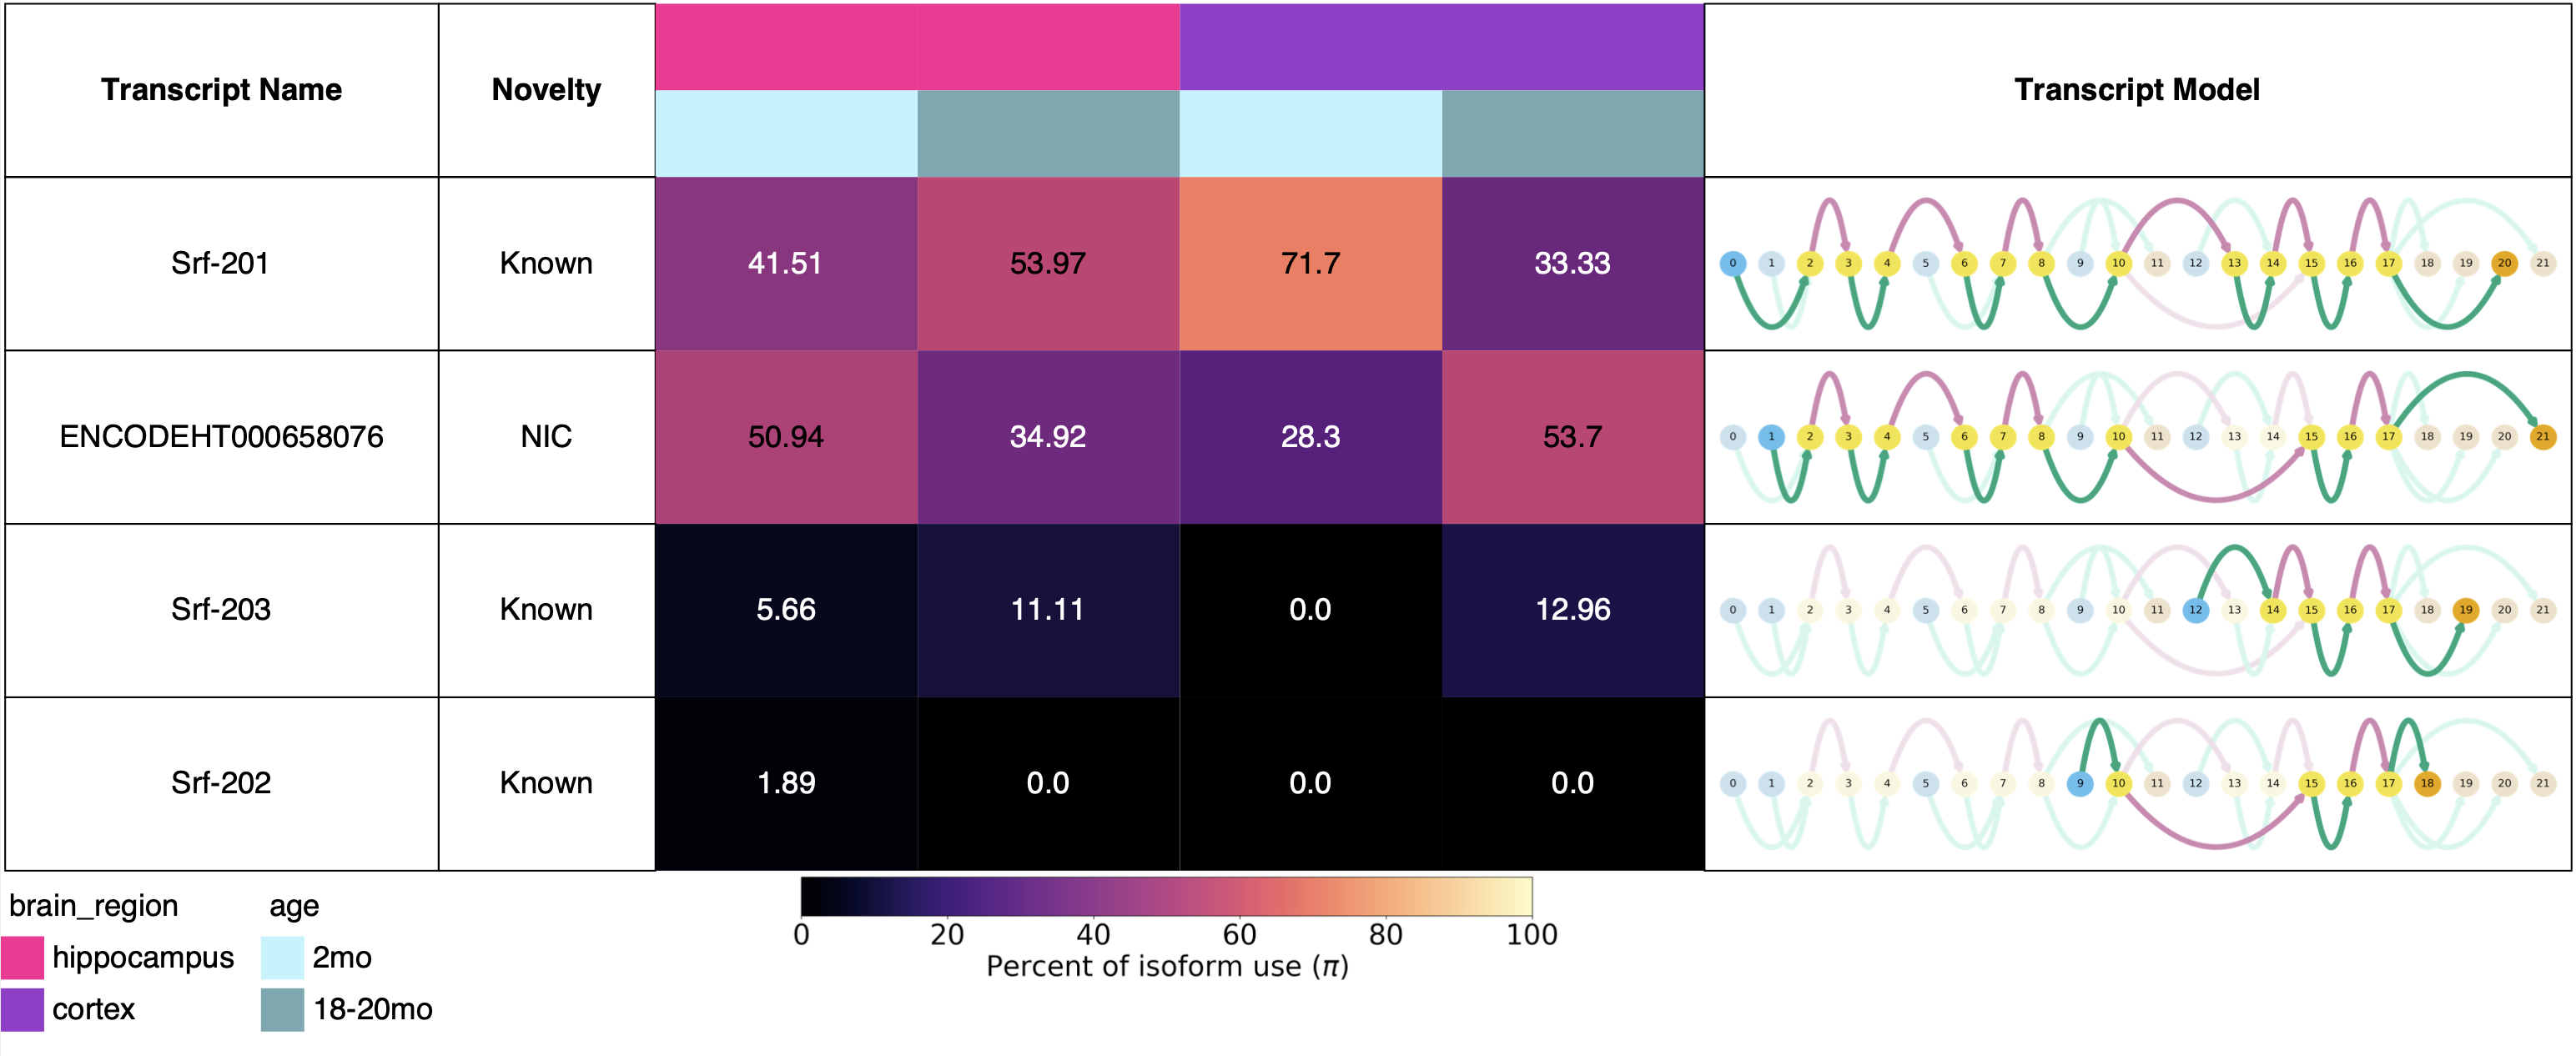

In [28]:
display(Image(filename='figures/srf_ENSMUSG00000015605.6_report.png'))

You can choose which datasets and the order in which they display in the report using the `datasets` option combined with different metadata. Suppose we want to restrict the datasets in the report to just the HFFc6 datasets, and we want to display the replicates 2 and 3 only, in descending order. Specify which categories from the relevant metadata columns you wish to include using a dictionary with the format `{metadata_column: [metadata_category1, metadata_category2 ...]}`. The output report will include the intersection of datasets that satisfy each condition. 

Here I've also demonstrated the `order` option, where you can order the transcripts based on transcript ID, expression level (default), or genomic location of TSS / TES (`[tid', 'expression', 'tss', 'tes']` respectively).

In [29]:
# generate a report for the given gene 
# save it with the given filepath prefix
# use the virids color way
# color cell lines by metadata colors
# restrict data shown to just the hffc6 cell line and replicates 3 and 2
# order transcripts based on genomic location of TSS
sg.gen_report('NIPAL3',
              prefix='figures/nipal3',
              cmap='viridis',
              metadata_cols=['cell_line', 'replicate'],
              datasets={'cell_line': 'hffc6', 'replicate': ['3', '2']},
              order='tss')


Plotting transcripts for ENSG00000001461.16
Saving transcript path graph for ENST00000374399.8 as figures/nipal3_ENST00000374399.8_path.png
Saving transcript path graph for ENST00000003912.7 as figures/nipal3_ENST00000003912.7_path.png
Saving transcript path graph for ENST00000488155.1 as figures/nipal3_ENST00000488155.1_path.png
Saving transcript path graph for ENST00000358028.8 as figures/nipal3_ENST00000358028.8_path.png
Saving transcript path graph for ENST00000339255.2 as figures/nipal3_ENST00000339255.2_path.png
Generating report for ENSG00000001461.16


As you can see here, the data displayed is limited to those belonging to hffc6 replicates 2 and 3, and we display replicates 3 and 2 in a specific order.

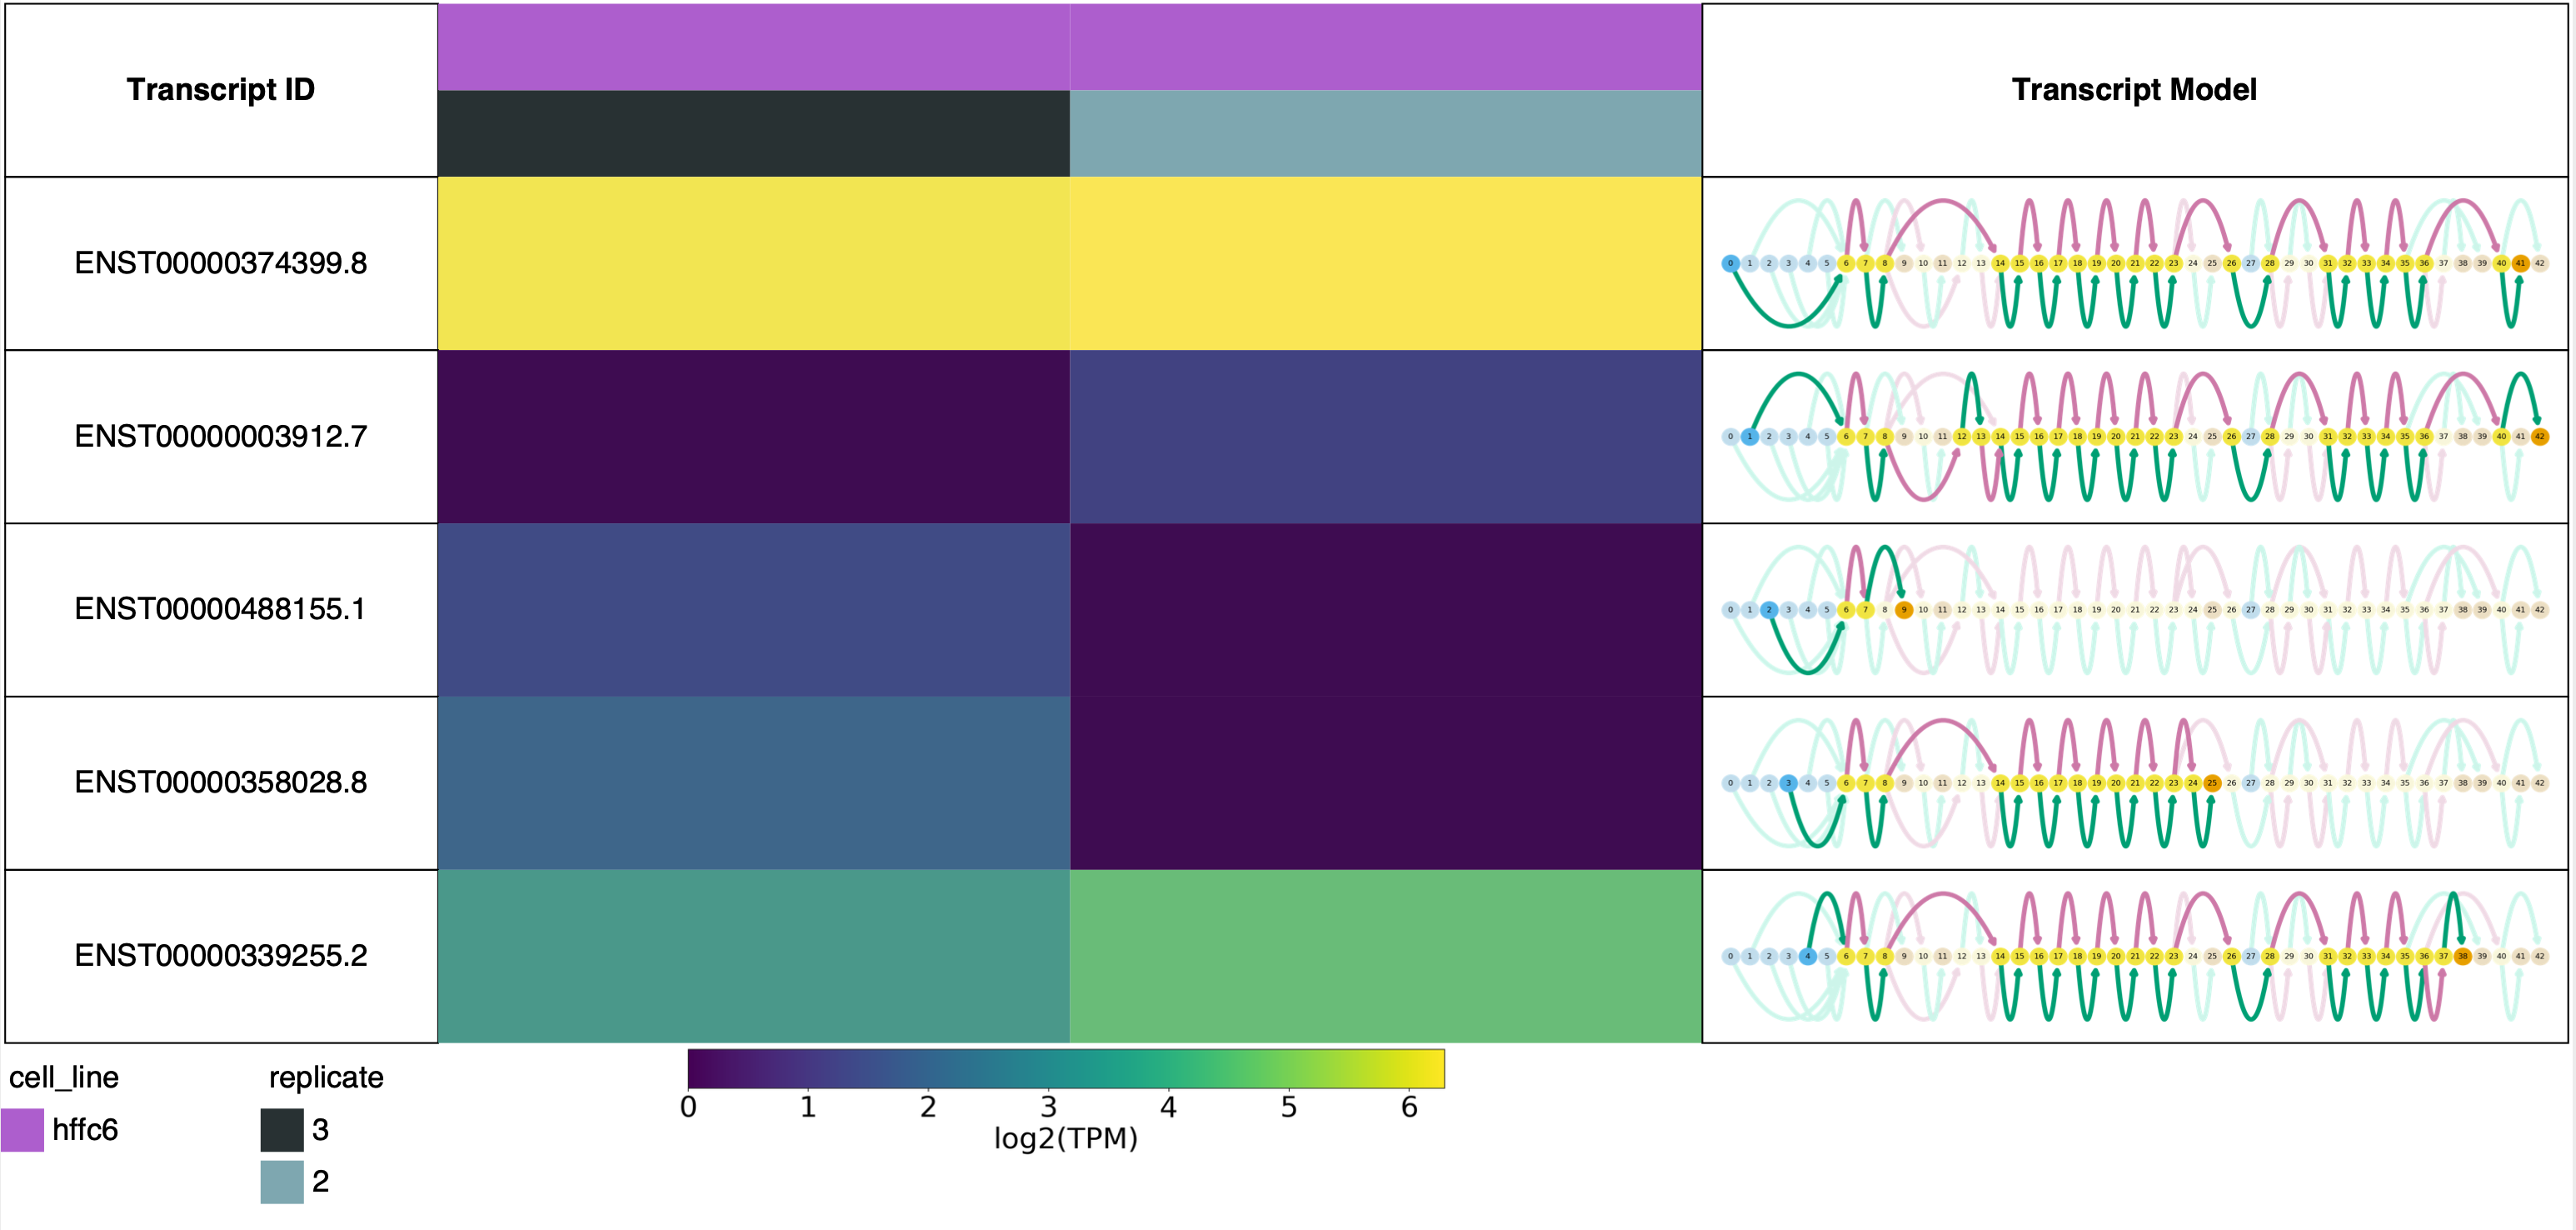

In [30]:
display(Image(filename='figures/nipal3_ENSG00000001461.16_report.png'))

And here I'll show all the hffc6 replicates ordered by tes.

In [31]:
# generate a report for the given gene 
# save it with the given filepath prefix
# use the virids color way
# color cell lines and replicates by metadata colors
# restrict data shown to just the hffc6 datasets
# order transcripts based on genomic location of TES
# use browser-style representation
sg.gen_report('NIPAL3',
              prefix='figures/nipal3',
              cmap='viridis',
              metadata_cols=['cell_line', 'replicate'],
              datasets={'cell_line': 'hffc6'},
              order='tes',
              browser=True)


Plotting transcripts for ENSG00000001461.16
Saving transcript path graph for ENST00000488155.1 as figures/nipal3_browser_ENST00000488155.1_path.png
Saving transcript path graph for ENST00000358028.8 as figures/nipal3_browser_ENST00000358028.8_path.png
Saving transcript path graph for ENST00000339255.2 as figures/nipal3_browser_ENST00000339255.2_path.png
Saving transcript path graph for ENST00000374399.8 as figures/nipal3_browser_ENST00000374399.8_path.png
Saving transcript path graph for ENST00000003912.7 as figures/nipal3_browser_ENST00000003912.7_path.png
Generating report for ENSG00000001461.16


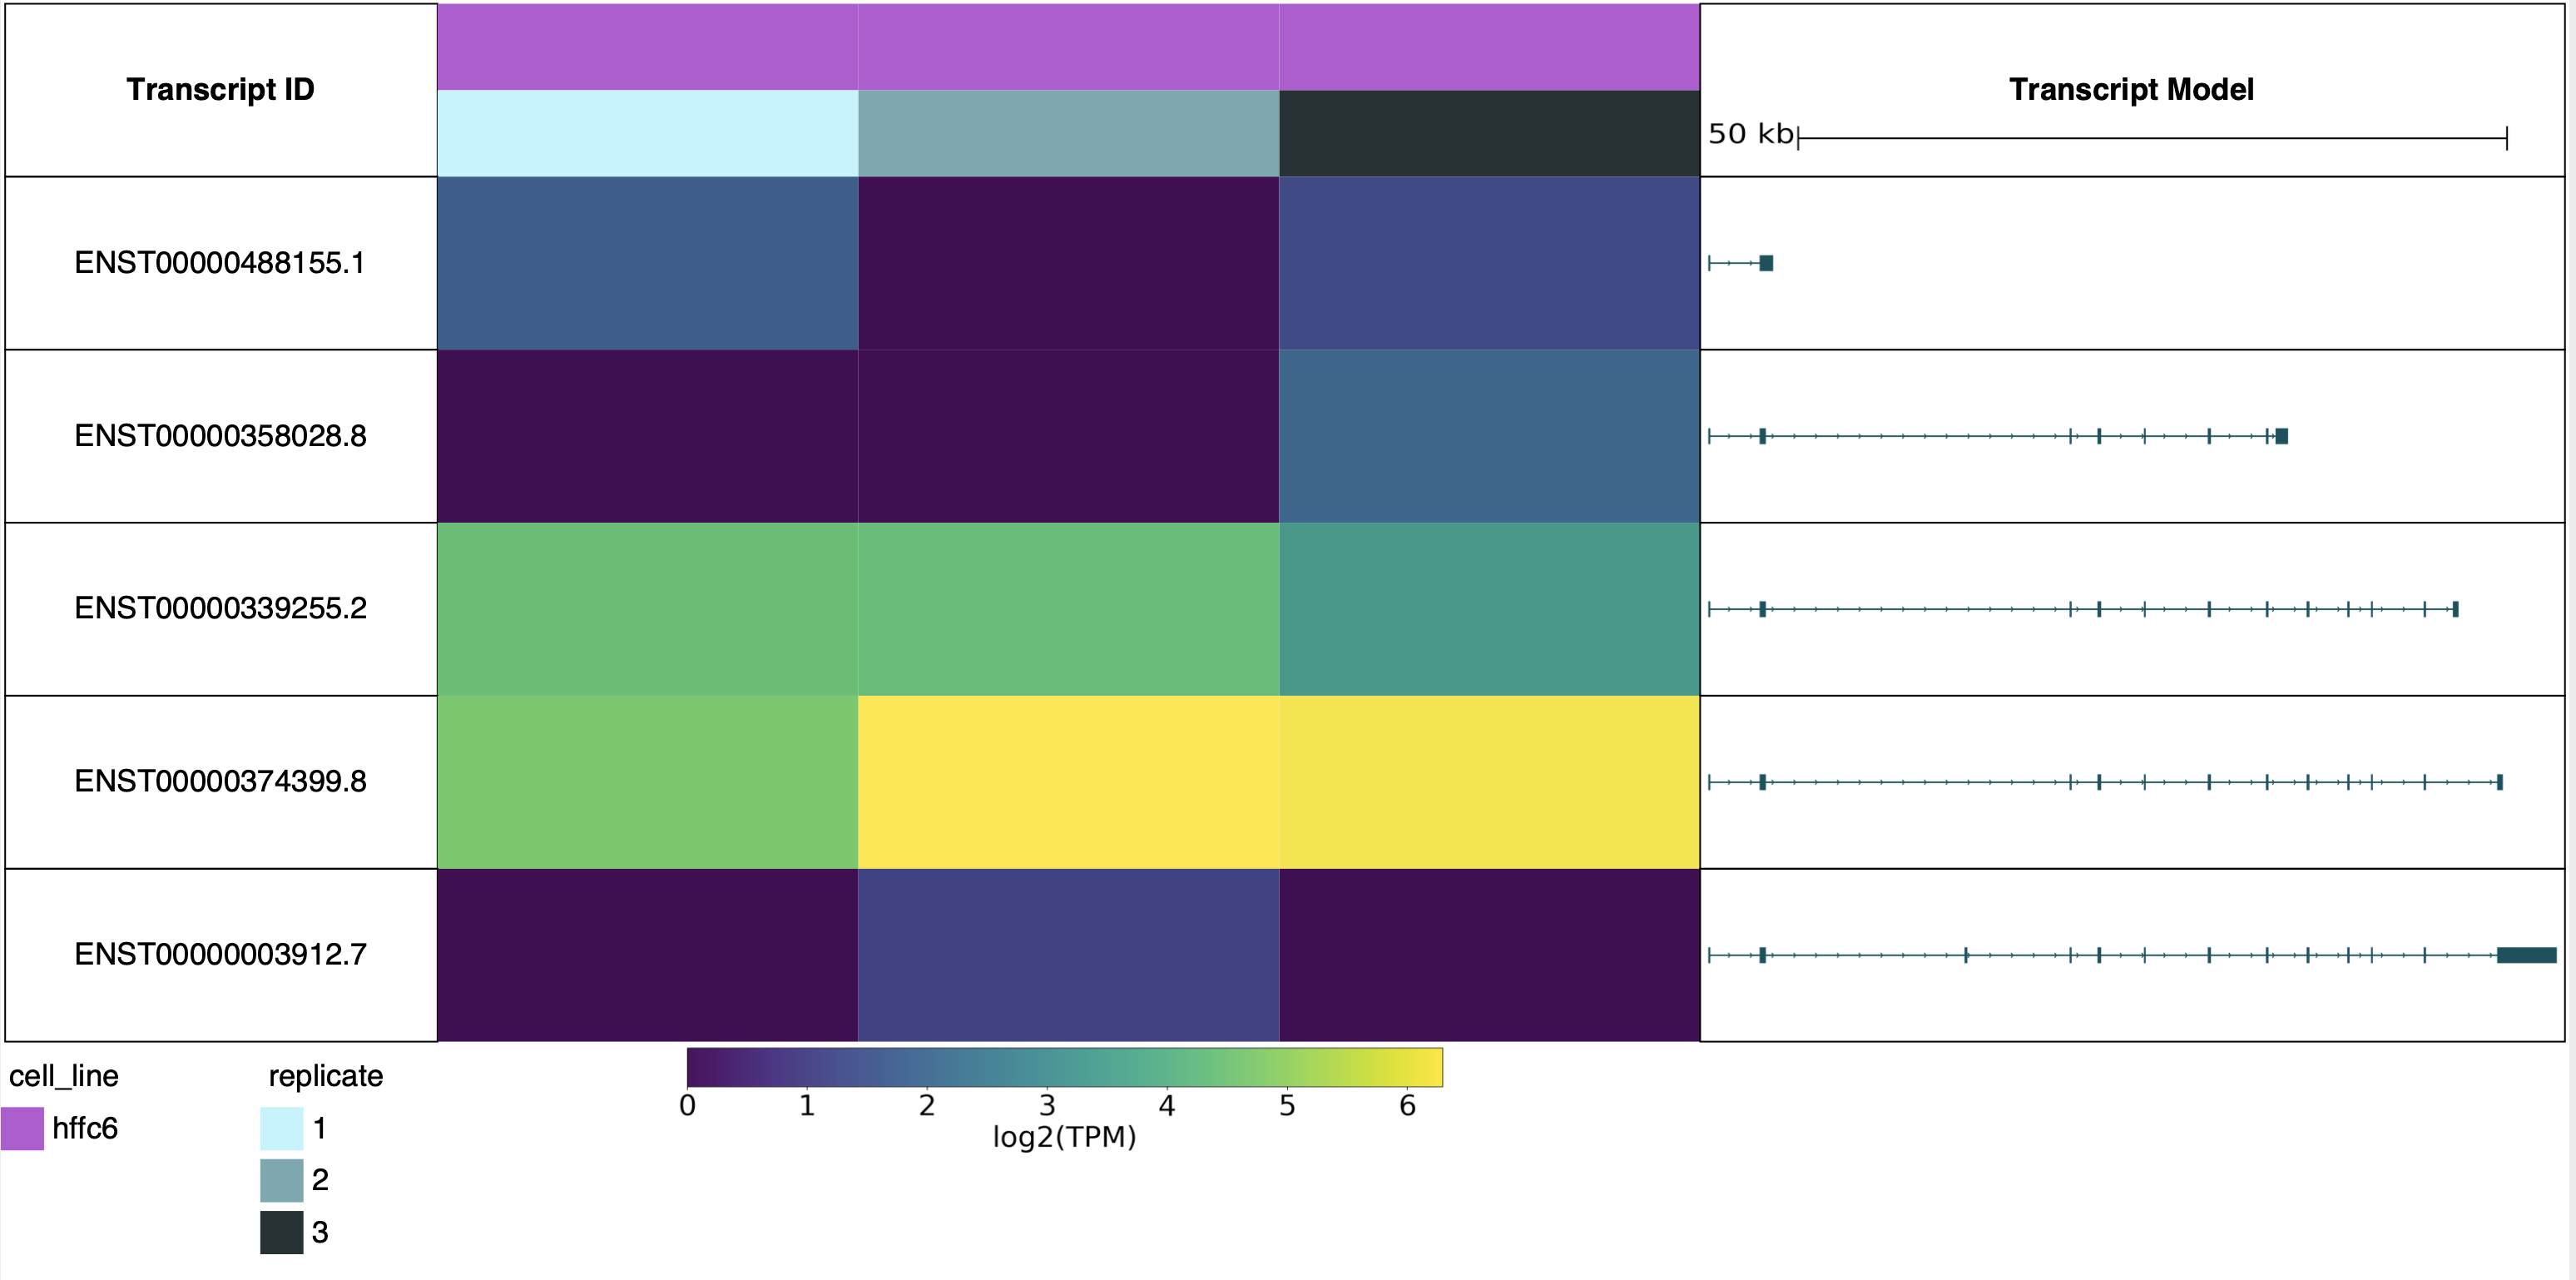

In [32]:
display(Image(filename='figures/nipal3_browser_hffc6_ENSG00000001461.16_report.png'))